# **Data 602 Introduction to Data Analysis and Machine Learning.**
# **Under Guidance of Prof. Murat Guner**
# **Final Project: Traffic Sign Detection**


# **Abstract:**
In this era of information technology, automation is playing an important role for reducing efforts of mankind.We propose an approach for traffic sign detection based on Convolutional Neural Networks (CNN). We first transform the original image into the gray scale image by using support of OpenCV, then use convolutional neural networks with fixed and learnable layers for detection and recognition. The fixed layer can reduce the amount of interest areas to detect, and crop the boundaries very close to the borders of traffic signs. The learnable layers can increase the accuracy of detection significantly. Besides, we use bootstrap methods to improve the accuracy and avoid overfitting problem. In the German Traffic Sign Detection Benchmark, we obtained competitive results, accuracy of 0.99 for relu and 0.9825 for tanh.[9] 

# **The Business problem and the goal:**

Self driving cars is the future at which the car industry is looking at. Lane-detection, Traffic-light detection, Traffic- signs detection etc. are the part of automation that are very essential for automation in self-driving cars. The automation in these fields are yet to be accurate and need more accuracy. In this project we will define a model, estimate model performance, imporve and save model. We will also try to compare different models and decide which will be more appropriate for the task in hand.

The goal of this project is to use image classification that is a supervised learning technique using Convolutional Neural Networks to detect traffic signs.
The secondary goal is to use different model to get the best results and achieve an accuracy of 95-99% for the same.
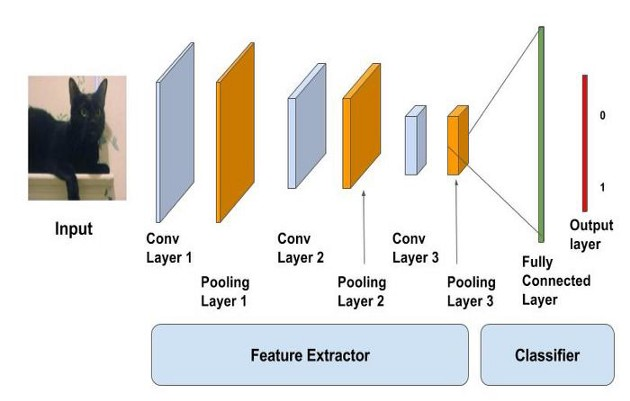

# **About the Dataset:**

The German traffic signs detection dataset is provided by [Benchmark](https://benchmark.ini.rub.de) . 

Data summary is available [here](https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign).

The dataset has 39209 images with 43 different classes. 
The images have been distributed unevenly between those classes and hence the model may predict some classes more accurately than other classes. There are no missing values or any discontinuties in the dataset.

For improving the model performance, we can populate the dataset with various image modifying techniques such as rotation, colour distortion or blurring the image. 

We will be training the model on the original dataset and will see the accuracy of the model. Then we’ll be adding more data and making each class even and check the model’s accuracy for future works.

License: CC0: Public Domain

Using wget to download the files.

In [1]:
!wget 'https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip'

--2020-12-08 18:12:19--  https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip
Resolving sid.erda.dk (sid.erda.dk)... 130.225.104.13
Connecting to sid.erda.dk (sid.erda.dk)|130.225.104.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 276294756 (263M) [application/zip]
Saving to: ‘GTSRB_Final_Training_Images.zip’

GTSRB_Final_Trainin 100%[===================>] 263.50M  27.8MB/s    in 10s     

2020-12-08 18:12:30 (25.4 MB/s) - ‘GTSRB_Final_Training_Images.zip’ saved [276294756/276294756]



In [2]:
#unzipping the data.
!unzip '/content/GTSRB_Final_Training_Images.zip'

Streaming output truncated to the last 5000 lines.
  inflating: GTSRB/Final_Training/Images/00035/00000_00019.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00000_00020.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00000_00021.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00000_00022.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00000_00023.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00000_00024.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00000_00025.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00000_00026.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00000_00027.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00000_00028.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00000_00029.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00001_00000.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00001_00001.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00001_00002.ppm  
  inflating: GTSRB/Final_Training/Image

In [3]:
#installing libraries.
!pip install scipy==1.1.0

     |████████████████████████████████| 31.2MB 160kB/s 
ERROR: umap-learn 0.4.6 has requirement scipy>=1.3.1, but you'll have scipy 1.1.0 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement scipy==1.4.1, but you'll have scipy 1.1.0 which is incompatible.
ERROR: plotnine 0.6.0 has requirement scipy>=1.2.0, but you'll have scipy 1.1.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


In [4]:
#importing and installing required libraries.
import os
import pandas as pd
from scipy.misc import imread
import cv2 as cv
import numpy as np
import matplotlib
from matplotlib import pyplot
import tensorflow as tf
import math
import numpy as np
import cv2
import keras
import seaborn as sns
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras.models import Sequential
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import seaborn as sns
!pip install keras 
!pip install np_utils
from keras.utils.np_utils import to_categorical
from numpy import mean
from numpy import std


In [5]:
# Loading the dataset.
data_dir = os.path.abspath('/content/GTSRB/Final_Training/Images')
os.path.exists(data_dir)

True

data_dir is the path to the directory where the dataset is stored.

# **Data PreProcessing and exploring:**

An important limitation that the Convolutional Neural Network models have is that it can't be trained on images with different dimensions. Thus, it becomes mandatory to make the dimensions of the images equal.

We will have to check the dimensions of the images in the given dataset so that we can process the images that do not have similar dimensions. This dataset has images of various dimensions ranging from 16* 16* 3 to 128* 128* 3. Therefore, it is not possible to pass them directly to the convolutional model. The solution to this issue is that we can either compress the images or interpolate them to a single dimension. Avoiding compressing or stretching of the image the dimensions I have decided to use is the middle of the range that is 64* 64* 3.
 
 We will use OpenCV package to tranform the dimension. Interpolation will define the type of technique we use for stretching or compressing the images. Based on the methods used to evaluate the values of pixel of the resulting image there are five interpolation techniques avaliable. The techniques are INTER_AREA, INTER_NEAREST, INTER_LINEAR, INTER_CUBIC, INTER_LANCZOS4 .
 
The interpolation technique we will be using will be INTER_AREA as it is more preferred for image decimation. You can use INTER_CUBIC but it requires high computation power that is the reason I avoided using it.  


In [6]:
# Defining function to resize the images using opencv.
def resize_cv(im):
    return cv2.resize(im, (64, 64), interpolation = cv2.INTER_LINEAR)

# **Transforming and Loading the dataset from the insights.**



ClassId is a unique id given for each traffic sign. From the graph we can see that there is a class imbalance (few classes have more data than the others). This will make the model biased in accurately predicting some traffic signs compared to others. Thus, the model will be baised in predicting few signs accurately. 

The solution to this issue is by making the data consistent by adding images of which are blue or rotated which will be the future work.

As the naming of these images are inconistent and the data is divided into various folders we will load and convert the dimension of the images and store them in a list and the traffic signs they resemble into another list. 

The function we will use to read these images is imread().


In [7]:
# Loading the dataset.
list_images = []
output = []
for dir in os.listdir(data_dir):
    if dir == '.DS_Store' :
        continue
    #Images in the path are in the form GT-00000.csv
    #Using os.path.join to join different directories.
    inner_dir = os.path.join(data_dir, dir)
    csv_file = pd.read_csv(os.path.join(inner_dir,"GT-" + dir + '.csv'), sep=';')
    for row in csv_file.iterrows() :
        img_path = os.path.join(inner_dir, row[1].Filename)
        img = cv.imread(img_path)
        img = img[row[1]['Roi.X1']:row[1]['Roi.X2'],row[1]['Roi.Y1']:row[1]['Roi.Y2'],:]
        img = resize_cv(img)
        list_images.append(img)
        output.append(row[1].ClassId)

In [8]:
csv_file

,Filename,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
0,00000_00000.ppm,34,33,6,5,29,28,22
1,00000_00001.ppm,35,35,6,6,30,30,22
2,00000_00002.ppm,35,35,5,6,29,30,22
3,00000_00003.ppm,36,36,5,5,31,31,22
4,00000_00004.ppm,37,38,5,6,32,33,22
...,...,...,...,...,...,...,...,...
385,00012_00025.ppm,80,75,7,7,73,69,22
386,00012_00026.ppm,91,84,8,7,83,77,22
387,00012_00027.ppm,97,89,9,8,89,82,22
388,00012_00028.ppm,109,101,9,9,100,93,22


We will load the dataset and convert them in the decided dimensions.

There are total 43 classes which means we have 43 different type of traffic signs that are present in the dataset and each of them have images wof different sizes and clarity.

Thus, to check how many images are present in each class we will plot a histogram.


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'ClassId'),
 Text(0.5, 1.0, 'Traffic signs frequency graph')]

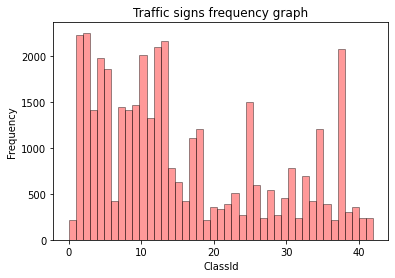

In [9]:
fig = sns.distplot(output, kde=False, bins = 43, hist = True, hist_kws=dict(edgecolor="black", linewidth=1),color="r")
fig.set(title = "Traffic signs frequency graph",
        xlabel = "ClassId",
        ylabel = "Frequency")

We will print the images in some row to have a knowledge about the different variations of images available for one sign.

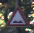

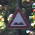

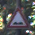

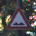

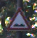

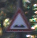

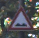

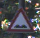

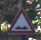

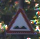

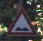

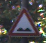

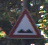

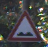

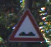

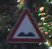

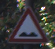

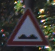

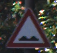

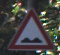

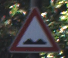

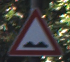

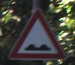

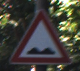

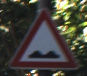

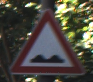

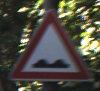

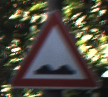

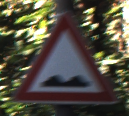

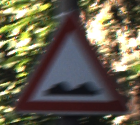

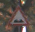

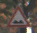

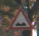

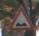

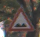

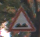

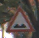

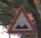

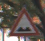

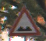

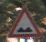

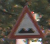

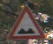

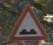

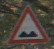

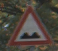

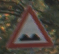

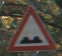

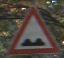

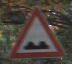

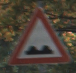

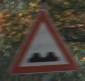

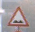

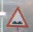

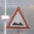

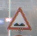

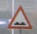

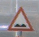

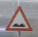

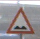

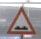

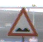

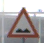

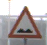

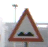

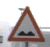

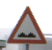

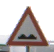

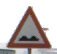

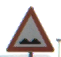

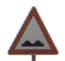

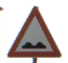

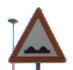

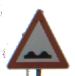

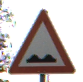

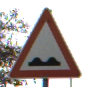

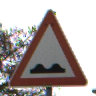

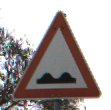

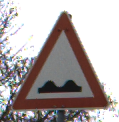

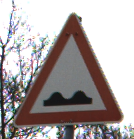

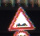

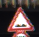

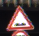

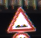

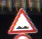

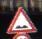

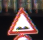

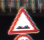

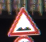

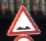

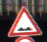

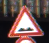

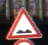

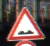

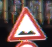

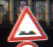

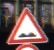

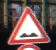

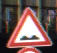

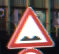

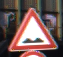

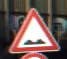

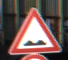

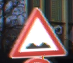

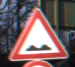

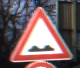

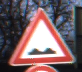

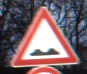

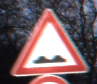

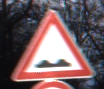

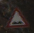

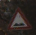

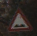

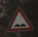

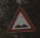

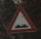

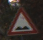

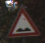

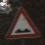

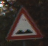

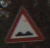

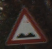

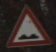

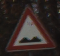

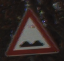

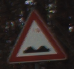

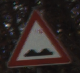

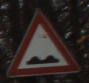

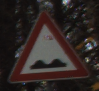

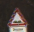

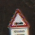

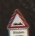

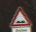

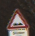

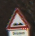

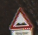

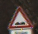

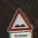

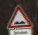

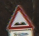

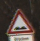

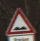

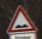

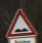

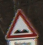

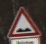

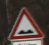

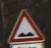

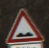

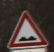

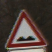

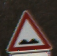

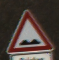

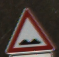

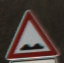

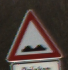

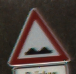

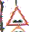

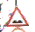

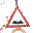

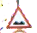

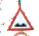

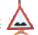

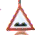

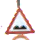

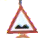

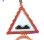

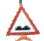

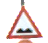

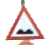

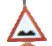

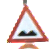

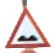

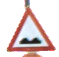

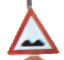

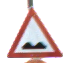

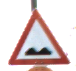

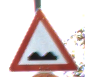

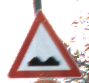

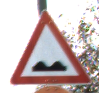

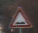

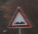

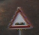

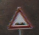

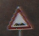

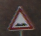

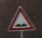

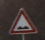

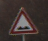

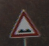

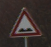

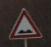

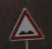

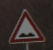

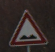

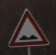

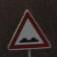

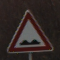

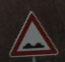

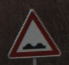

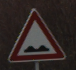

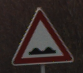

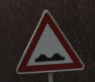

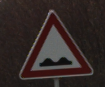

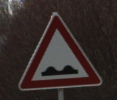

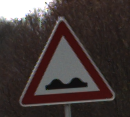

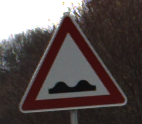

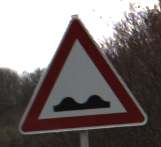

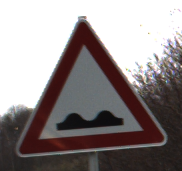

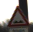

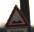

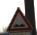

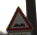

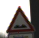

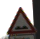

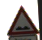

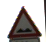

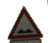

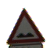

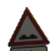

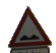

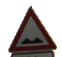

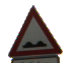

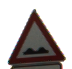

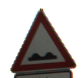

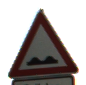

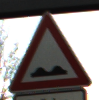

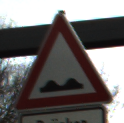

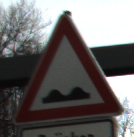

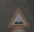

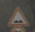

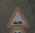

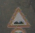

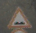

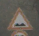

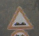

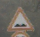

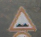

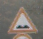

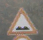

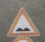

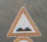

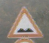

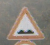

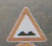

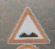

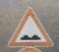

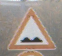

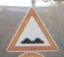

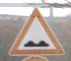

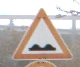

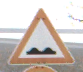

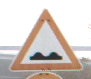

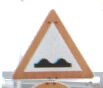

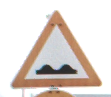

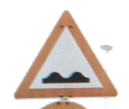

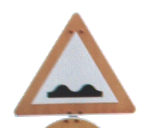

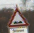

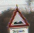

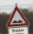

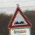

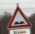

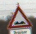

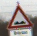

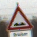

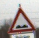

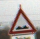

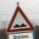

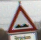

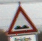

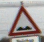

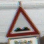

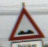

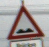

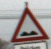

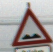

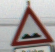

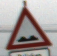

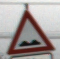

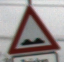

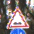

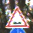

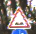

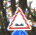

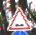

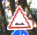

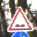

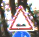

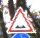

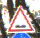

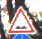

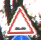

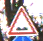

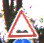

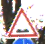

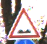

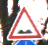

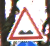

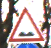

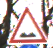

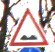

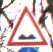

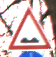

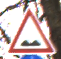

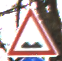

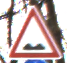

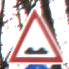

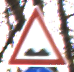

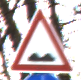

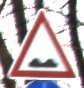

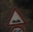

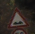

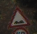

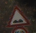

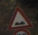

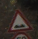

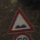

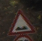

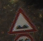

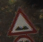

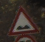

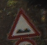

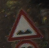

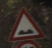

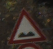

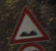

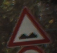

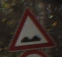

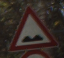

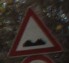

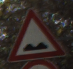

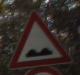

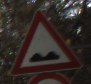

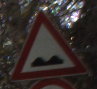

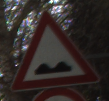

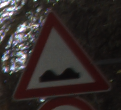

/content/GTSRB/Final_Training/Images/00022/00012_00029.ppm


In [10]:
for row in csv_file.iterrows() :
        img_path = os.path.join(inner_dir, row[1].Filename)
        img = cv.imread(img_path)
        cv2_imshow(img)
print(img_path)

After loading the data we have to divide the data into train,test and validation sets.  

The dataset is loaded and now we need to divide it into training and testing set. And also in validation set. But if we divide directly then the model will not be get trained all the traffic signs as the dataset is not randomized. So, first we’ll randomize the dataset.

We will split the dataset in a ratio of 60:20:20 for training, validation and testing respectively.


In [11]:
input_array = np.stack(list_images)
import keras
train_y = keras.utils.np_utils.to_categorical(output)
randomize = np.arange(len(input_array))
np.random.shuffle(randomize)
x = input_array[randomize]
y = train_y[randomize]

### Splitting the dataset in train, validation, test set
split_size = int(x.shape[0]*0.6)
train_x, val_x = x[:split_size], x[split_size:]
train1_y, val_y = y[:split_size], y[split_size:]

split_size = int(val_x.shape[0]*0.5)
val_x, test_x = val_x[:split_size], val_x[split_size:]
val_y, test_y = val_y[:split_size], val_y[split_size:]

# **Building and Shortlisting the models.**

In this task we will use two different activation functions which are "relu" and "tanh". Feel free to use different activation functions to assess model parameters and achieve better results.

 The model has two main aspects: the feature extraction front end comprised of convolutional, batch normalization and pooling layers, and the classifier backend that will make a prediction.
 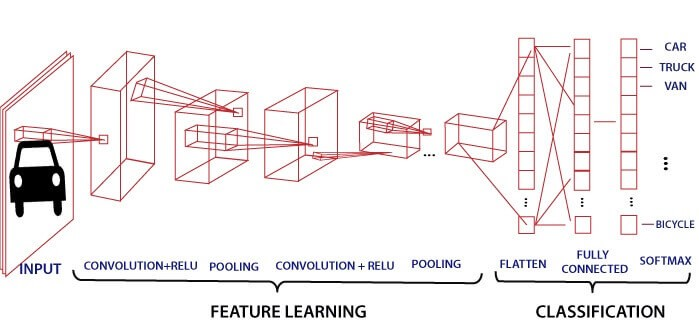
 
  There can be more layers that can be added. Feel free to experiment with it for better results.

For more information on what are convolution layers and how to use convolution layers you can [click here](https://medium.com/@sdoshi579/convolutional-neural-network-learn-and-apply-3dac9acfe2b6).

# **Defining Model 1 and Fine Tuning the model using flatten, dense layers and softmax activation.**

In [12]:
#Building the model
hidden_num_units = 2048
hidden_num_units1 = 1024
hidden_num_units2 = 128
output_num_units = 43

epochs = 10
batch_size = 16
pool_size = (2, 2)
input_shape = Input(shape=(32, 32,3))

model = Sequential([

 Conv2D(16, (3, 3), activation='relu', input_shape=(64,64,3), padding='same'),
 BatchNormalization(),

 Conv2D(16, (3, 3), activation='relu', padding='same'),
 BatchNormalization(),
 MaxPooling2D(pool_size=pool_size),
 Dropout(0.2),
    
 Conv2D(32, (3, 3), activation='relu', padding='same'),
 BatchNormalization(),
    
 Conv2D(32, (3, 3), activation='relu', padding='same'),
 BatchNormalization(),
 MaxPooling2D(pool_size=pool_size),
 Dropout(0.2),
    
 Conv2D(64, (3, 3), activation='relu', padding='same'),
 BatchNormalization(),
    
 Conv2D(64, (3, 3), activation='relu', padding='same'),
 BatchNormalization(),
 MaxPooling2D(pool_size=pool_size),
 Dropout(0.2),

 Flatten(),

 Dense(units=hidden_num_units, activation='relu'),
 Dropout(0.3),
 Dense(units=hidden_num_units1, activation='relu'),
 Dropout(0.3),
 Dense(units=hidden_num_units2, activation='relu'),
 Dropout(0.3),
 Dense(units=output_num_units, input_dim=hidden_num_units, activation='softmax'),
])

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4), metrics=['accuracy'])

#Training the model
cnn_model_conv = model.fit(train_x.reshape(-1,64,64,3), train1_y, epochs=epochs, batch_size=batch_size, validation_data=(val_x, val_y))                               

#Predicting the class
pred = model.predict_classes(test_x)

Epoch 1/10
1471/1471 [==============================] - 13s 9ms/step - loss: 2.5732 - accuracy: 0.3050 - val_loss: 1.3135 - val_accuracy: 0.6093
Epoch 2/10
1471/1471 [==============================] - 13s 9ms/step - loss: 1.0742 - accuracy: 0.6684 - val_loss: 0.3316 - val_accuracy: 0.8998
Epoch 3/10
1471/1471 [==============================] - 13s 9ms/step - loss: 0.4193 - accuracy: 0.8678 - val_loss: 0.1263 - val_accuracy: 0.9649
Epoch 4/10
1471/1471 [==============================] - 13s 9ms/step - loss: 0.2145 - accuracy: 0.9332 - val_loss: 0.0802 - val_accuracy: 0.9784
Epoch 5/10
1471/1471 [==============================] - 13s 9ms/step - loss: 0.1300 - accuracy: 0.9595 - val_loss: 0.0517 - val_accuracy: 0.9875
Epoch 6/10
1471/1471 [==============================] - 13s 9ms/step - loss: 0.0923 - accuracy: 0.9709 - val_loss: 0.0530 - val_accuracy: 0.9848
Epoch 7/10
1471/1471 [==============================] - 13s 9ms/step - loss: 0.0653 - accuracy: 0.9803 - val_loss: 0.0382 - val_ac

In [13]:
#evaluating the model.
model.evaluate(test_x, test_y)

246/246 [==============================] - 1s 3ms/step - loss: 0.0466 - accuracy: 0.9898


[0.04662555083632469, 0.9897985458374023]

In [14]:
#history fo the parameters during the 10 epochs.
cnn_accuracy     = cnn_model_conv.history['accuracy']
cnn_val_accuracy = cnn_model_conv.history['val_accuracy']
loss             = cnn_model_conv.history['loss'] 
val_loss         = cnn_model_conv.history['val_loss']
epochs = [i for i in range (1,11)]

We will plot the train and validation accuracy and the train and validation loss for this model.

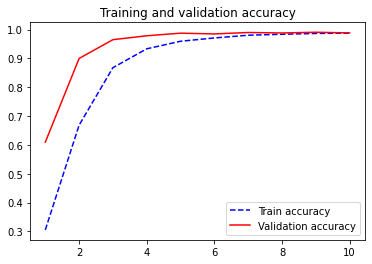

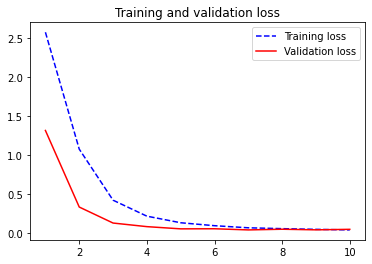

In [15]:
plt.plot(epochs, cnn_accuracy, 'b--', label = 'Train accuracy')
plt.plot(epochs, cnn_val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.savefig('Accuracy values')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b--', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('Loss values')
plt.show()

# **Defining Model 2 and Fine Tuning the model using flatten, dense layers and softmax activation .**

In [22]:
hidden_num_units = 2048
hidden_num_units1 = 1024
hidden_num_units2 = 128
output_num_units = 43

epochs = 10
batch_size = 16
pool_size = (2, 2)
input_shape = Input(shape=(32, 32,3))

model = Sequential([

 Conv2D(16, (3, 3), activation='tanh', input_shape=(64,64,3), padding='same'),
 BatchNormalization(),

 Conv2D(16, (3, 3), activation='tanh', padding='same'),
 BatchNormalization(),
 MaxPooling2D(pool_size=pool_size),
 Dropout(0.2),
    
 Conv2D(32, (3, 3), activation='tanh', padding='same'),
 BatchNormalization(),
    
 Conv2D(32, (3, 3), activation='tanh', padding='same'),
 BatchNormalization(),
 MaxPooling2D(pool_size=pool_size),
 Dropout(0.2),
    
 Conv2D(64, (3, 3), activation='tanh', padding='same'),
 BatchNormalization(),
    
 Conv2D(64, (3, 3), activation='tanh', padding='same'),
 BatchNormalization(),
 MaxPooling2D(pool_size=pool_size),
 Dropout(0.2),

 Flatten(),

 Dense(units=hidden_num_units, activation='tanh'),
 Dropout(0.3),
 Dense(units=hidden_num_units1, activation='tanh'),
 Dropout(0.3),
 Dense(units=hidden_num_units2, activation='tanh'),
 Dropout(0.3),
 Dense(units=output_num_units, input_dim=hidden_num_units, activation='softmax'),
])

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4), metrics=['accuracy'])

#Training the model
cnn_model_conv_tanh = model.fit(train_x.reshape(-1,64,64,3), train1_y, epochs=epochs, batch_size=batch_size, validation_data=(val_x, val_y))                               

#Predicting the class
pred = model.predict_classes(test_x)

Epoch 1/10
1471/1471 [==============================] - 13s 9ms/step - loss: 1.9012 - accuracy: 0.4628 - val_loss: 0.7987 - val_accuracy: 0.7654
Epoch 2/10
1471/1471 [==============================] - 13s 9ms/step - loss: 0.7655 - accuracy: 0.7797 - val_loss: 0.4056 - val_accuracy: 0.8801
Epoch 3/10
1471/1471 [==============================] - 13s 9ms/step - loss: 0.4332 - accuracy: 0.8806 - val_loss: 0.2141 - val_accuracy: 0.9433
Epoch 4/10
1471/1471 [==============================] - 13s 9ms/step - loss: 0.2795 - accuracy: 0.9243 - val_loss: 0.1563 - val_accuracy: 0.9574
Epoch 5/10
1471/1471 [==============================] - 13s 9ms/step - loss: 0.1885 - accuracy: 0.9512 - val_loss: 0.1098 - val_accuracy: 0.9703
Epoch 6/10
1471/1471 [==============================] - 13s 9ms/step - loss: 0.1357 - accuracy: 0.9658 - val_loss: 0.0951 - val_accuracy: 0.9756
Epoch 7/10
1471/1471 [==============================] - 13s 9ms/step - loss: 0.1098 - accuracy: 0.9713 - val_loss: 0.0810 - val_ac

In [18]:
#history of the parameters for 10 epochs.
cnn_accuracy_tanh     = cnn_model_conv_tanh.history['accuracy']
cnn_val_accuracy_tanh= cnn_model_conv_tanh.history['val_accuracy']
loss_tanh             = cnn_model_conv_tanh.history['loss'] 
val_loss_tanh        = cnn_model_conv_tanh.history['val_loss']
epochs = [i for i in range (1,11)]

We will plot the train and validation accuracy and the train and validation loss for for both the models and compare their performances.

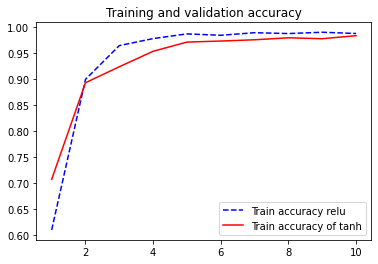

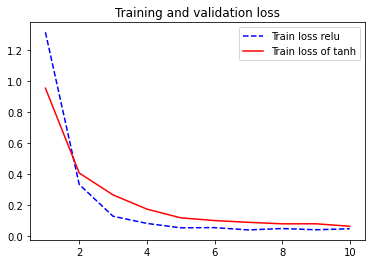

In [19]:
plt.plot(epochs, cnn_model_conv.history['val_accuracy'], 'b--', label = 'Train accuracy relu')
plt.plot(epochs, cnn_model_conv_tanh.history['val_accuracy'], 'r', label = 'Train accuracy of tanh')
plt.title('Training and validation accuracy')
plt.savefig('Accuracy values')
plt.legend()

plt.figure()
plt.plot(epochs, cnn_model_conv.history['val_loss'], 'b--', label = 'Train loss relu')
plt.plot(epochs, cnn_model_conv_tanh.history['val_loss'], 'r', label = 'Train loss of tanh')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('Loss values')
plt.show()

# **Conclusion and Shortlisting the model based on results.**

From the above plots we can see that the relu model attains more accuracy during the end of the 10 epochs which is 0.99. This accuracy is not very better from tanh which has an accuracy of 0.9825. Thus, we will select relu as a model appropriate for the task. Note: These values will change for different number of layers and epochs. Fell free to experiment for better results. 

# **Limitations and Future works.**

**Vanishing gradient problem:**

The reason I wanted to compare relu and tanh was to check if this model faces [Vanishing gradient problem](https://https://machinelearningmastery.com/how-to-fix-vanishing-gradients-using-the-rectified-linear-activation-function/#:~:text=Vanishing%20gradients%20is%20a%20particular,network%20that%20requires%20weight%20updates.). As we can see from the results, that there is not much difference between the validation accuracy but still relu activation out performs tanh activation even in this small network.
My future work will be to extend the model more deeper and apply leaky_relu and relu for a better comparison. 

There can be different models and number of layers that can be experimented with. There is still a class balance problem that has to be addressed for accurate prediction of all the signs. This will be the future work to add new images with rotation, blur etc. for the classes with less data for a better model prediction.

# **References and Related work:**
1. https://machinelearningmastery.com/how-to-fix-vanishing-gradients-using-the-rectified-linear-activation-function/#:~:text=Vanishing%20gradients%20is%20a%20particular,network%20that%20requires%20weight%20updates.
2. https://seaborn.pydata.org/generated/seaborn.distplot.html
3. https://stackoverflow.com/questions/44806125/attributeerror-model-object-has-no-attribute-predict-classes
4. https://medium.com/@sdoshi579/convolutional-neural-network-learn-and-apply-3dac9acfe2b6
5. https://keras.io/api/layers/activations/
6. https://pypi.org/project/wget/
7. https://towardsdatascience.com/traffic-sign-detection-using-convolutional-neural-network-660fb32fe90e
8. https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
9. Y. Wu, Y. Liu, J. Li, H. Liu and X. Hu, "Traffic sign detection based on convolutional neural networks," The 2013 International Joint Conference on Neural Networks (IJCNN), Dallas, TX, 2013, pp. 1-7, doi: 10.1109/IJCNN.2013.6706811.

# Contributed By: Rushabh Shah